In [136]:
from sklearn.neighbors import *
from sklearn.metrics import *
from sklearn.model_selection import *
from numpy import *
from matplotlib import pyplot as plt

In [137]:
def get_euclidean_distance(x1, x2):
  return sqrt(sum((x1 - x2) ** 2))

## Haralick

In [138]:
h_tx=loadtxt('data/lab3/haralickTrain.txt')
h_ty=h_tx[:,0] # class label, first column
h_tx=delete(h_tx,0, 1) # delete first column
h_sx=loadtxt('data/lab3/haralickTest.txt')
h_sy=h_sx[:,0]
h_sx=delete(h_sx,0, 1)
model=KNeighborsClassifier(n_neighbors=1).fit(h_tx, h_ty)
z=model.predict(h_sx) # apply classifier
acc=accuracy_score(h_sy, z)
kappa = cohen_kappa_score(h_sy, z)
print('Accuracy= %.2f kappa= %.2f\n'%(acc*100, kappa*100))

Accuracy= 64.12 kappa= 63.44



### calculate Euclidean distance

In [139]:
predict = []
for test in h_sx:
  euclidean_distance = [get_euclidean_distance(test, train) for train in h_tx]
  predict.append(h_ty[argmin(euclidean_distance)])

acc = accuracy_score(h_sy, predict)
kappa = cohen_kappa_score(h_sy, predict)
print('Euclidean distance result:')
print('Accuracy= %.2f\n'%(acc*100))

Euclidean distance result:
Accuracy= 64.12



### Implement and report other measures to estimate the quality of the classifier: the Cohen kappa and the confusion matrix.

Euclidean distance result:
kappa= 63.44



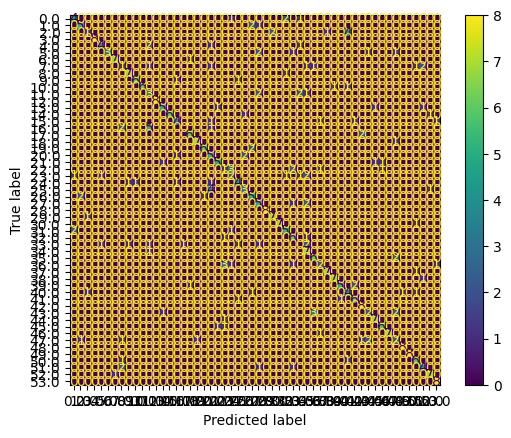

In [140]:
kappa = cohen_kappa_score(h_sy, predict)
print('Euclidean distance result:')
print('kappa= %.2f\n'%(kappa*100))

y_label = unique(h_sy)
confuse_matrix = confusion_matrix(h_sy, predict)
display = ConfusionMatrixDisplay(confusion_matrix=confuse_matrix, display_labels=y_label)
display.plot()

plt.show()

### Joint the training and test sets and calculate the performance using cross-validation with four folds (K=4) and the classifier 1NN. Calculate the accuraccy and Cohen kappa.

In [141]:
X = vstack((h_tx, h_sx))
y = hstack((h_ty, h_sy))

model=KNeighborsClassifier(n_neighbors=1)
k_fold = KFold(n_splits=4, shuffle=True, random_state=100)
acc = make_scorer(accuracy_score)
kappa = make_scorer(cohen_kappa_score)
acc = cross_val_score(model, X, y, cv=k_fold, scoring=acc)
kappa = cross_val_score(model, X, y, cv=k_fold, scoring=kappa)
mean_acc = mean(acc)
mean_kappa = mean(kappa)

print('Accuracy= %.2f kappa= %.2f\n'%(mean_acc*100, mean_kappa*100))

Accuracy= 65.28 kappa= 64.56



### Joint the training and test sets and implement the cross-validation using four folds and three sets (training, validation and test set). Use a kNN classifier instead of 1NN classifier, tuning the k parameter (number of neighbours) using the validation set. Calculate the Cohen kappa and the value of k.

In [142]:
X = vstack((h_tx, h_sx))
y = hstack((h_ty, h_sy))

k_fold = KFold(n_splits=4, shuffle=True, random_state=200)

k_values = []
kappas = []
for train_idx, test_idx in k_fold.split(X):
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]
  # split validation dataset
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=200)
  # grid search
  param = {'n_neighbors': arange(1, 100)}
  grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param, cv=3, scoring=make_scorer(cohen_kappa_score))
  grid_search.fit(X_train, y_train)
  # get k value
  k = grid_search.best_params_['n_neighbors']
  k_values.append(k)

  model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  z = model.predict(X_test)

  kappa = cohen_kappa_score(y_test, z)
  kappas.append(kappa)

k = mean(k_values)
kappa = mean(kappas)
print('K value= %.0f kappa= %.2f\n'%(k, kappa*100))

K value= 1 kappa= 61.74



## LBP

In [143]:
l_tx=loadtxt('data/lab3/lbpTrain.txt')
l_ty=l_tx[:,0] # class label, first column
l_tx=delete(l_tx,0, 1) # delete first column
l_sx=loadtxt('data/lab3/lbpTest.txt')
l_sy=l_sx[:,0]
l_sx=delete(l_sx,0, 1)
model=KNeighborsClassifier(n_neighbors=1).fit(l_tx, l_ty)
z=model.predict(l_sx) # apply classifier
acc=accuracy_score(l_sy, z)
kappa = cohen_kappa_score(l_sy, z)
print('Accuracy= %.2f kappa= %.2f\n'%(acc*100, kappa*100))

Accuracy= 65.97 kappa= 65.33



### calculate Euclidean distance

In [144]:
predict = []
for test in l_sx:
  euclidean_distance = [get_euclidean_distance(test, train) for train in l_tx]
  predict.append(l_ty[argmin(euclidean_distance)])

acc = accuracy_score(l_sy, predict)
print('Euclidean distance result:')
print('Accuracy= %.2f\n'%(acc*100))

Euclidean distance result:
Accuracy= 65.97



### Implement and report other measures to estimate the quality of the classifier: the Cohen kappa and the confusion matrix.

Euclidean distance result:
kappa= 65.33



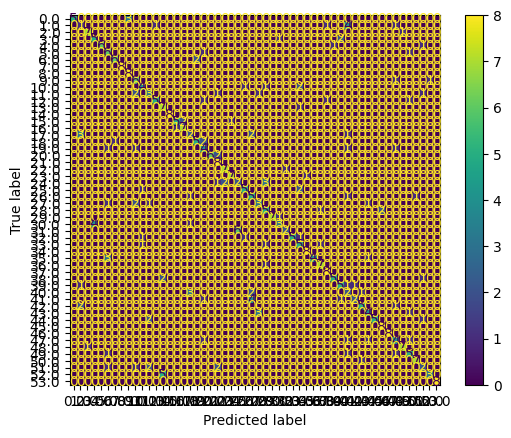

In [145]:
kappa = cohen_kappa_score(l_sy, predict)
print('Euclidean distance result:')
print('kappa= %.2f\n'%(kappa*100))

y_label = unique(l_sy)
confuse_matrix = confusion_matrix(l_sy, predict)
display = ConfusionMatrixDisplay(confusion_matrix=confuse_matrix, display_labels=y_label)
display.plot()

plt.show()

### Joint the training and test sets and calculate the performance using cross-validation with four folds (K=4) and the classifier 1NN. Calculate the accuraccy and Cohen kappa.

In [146]:
X = vstack((l_tx, l_sx))
y = hstack((l_ty, l_sy))

model=KNeighborsClassifier(n_neighbors=1)
k_fold = KFold(n_splits=4, shuffle=True, random_state=100)
acc = make_scorer(accuracy_score)
kappa = make_scorer(cohen_kappa_score)
acc = cross_val_score(model, X, y, cv=k_fold, scoring=acc)
kappa = cross_val_score(model, X, y, cv=k_fold, scoring=kappa)
mean_acc = mean(acc)
mean_kappa = mean(kappa)

print('Accuracy= %.2f kappa= %.2f\n'%(mean_acc*100, mean_kappa*100))

Accuracy= 62.27 kappa= 61.49



### Joint the training and test sets and implement the cross-validation using four folds and three sets (training, validation and test set). Use a kNN classifier instead of 1NN classifier, tuning the k parameter (number of neighbours) using the validation set. Calculate the Cohen kappa and the value of k.

In [147]:
X = vstack((l_tx, l_sx))
y = hstack((l_ty, l_sy))

k_fold = KFold(n_splits=4, shuffle=True, random_state=200)

k_values = []
kappas = []
for train_idx, test_idx in k_fold.split(X):
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]
  # split validation dataset
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=200)
  # grid search
  param = {'n_neighbors': arange(1, 100)}
  grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param, cv=3, scoring=make_scorer(cohen_kappa_score))
  grid_search.fit(X_train, y_train)
  # get k value
  k = grid_search.best_params_['n_neighbors']
  k_values.append(k)

  model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  z = model.predict(X_test)

  kappa = cohen_kappa_score(y_test, z)
  kappas.append(kappa)

k = mean(k_values)
kappa = mean(kappas)
print('K value= %.0f kappa= %.2f\n'%(k, kappa*100))

K value= 1 kappa= 58.55



### MLBP

In [148]:
m_tx=loadtxt('data/lab3/mlbpTrain.txt')
m_ty=m_tx[:,0] # class label, first column
m_tx=delete(m_tx,0, 1) # delete first column
m_sx=loadtxt('data/lab3/mlbpTest.txt')
m_sy=m_sx[:,0]
m_sx=delete(m_sx,0, 1)
model=KNeighborsClassifier(n_neighbors=1).fit(m_tx, m_ty)
z=model.predict(m_sx) # apply classifier
acc=accuracy_score(m_sy, z)
kappa = cohen_kappa_score(m_sy, z)
print('Accuracy= %.2f kappa= %.2f\n'%(acc*100, kappa*100))

Accuracy= 86.81 kappa= 86.56



### calculate Euclidean distance

In [149]:
predict = []
for test in m_sx:
  euclidean_distance = [get_euclidean_distance(test, train) for train in m_tx]
  predict.append(m_ty[argmin(euclidean_distance)])

acc = accuracy_score(m_sy, predict)
print('Euclidean distance result:')
print('Accuracy= %.2f\n'%(acc*100))

Euclidean distance result:
Accuracy= 86.81



### Implement and report other measures to estimate the quality of the classifier: the Cohen kappa and the confusion matrix.

Euclidean distance result:
kappa= 86.56



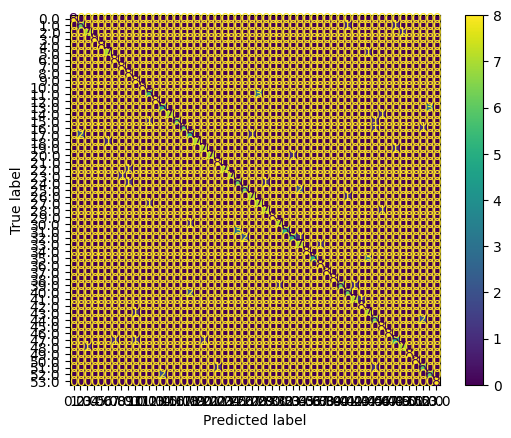

In [150]:
kappa = cohen_kappa_score(m_sy, predict)
print('Euclidean distance result:')
print('kappa= %.2f\n'%(kappa*100))

y_label = unique(m_sy)
confuse_matrix = confusion_matrix(m_sy, predict)
display = ConfusionMatrixDisplay(confusion_matrix=confuse_matrix, display_labels=y_label)
display.plot()

plt.show()

### Joint the training and test sets and calculate the performance using cross-validation with four folds (K=4) and the classifier 1NN. Calculate the accuraccy and Cohen kappa.

In [151]:
X = vstack((m_tx, m_sx))
y = hstack((m_ty, m_sy))

model=KNeighborsClassifier(n_neighbors=1)
k_fold = KFold(n_splits=4, shuffle=True, random_state=100)
acc = make_scorer(accuracy_score)
kappa = make_scorer(cohen_kappa_score)
acc = cross_val_score(model, X, y, cv=k_fold, scoring=acc)
kappa = cross_val_score(model, X, y, cv=k_fold, scoring=kappa)
mean_acc = mean(acc)
mean_kappa = mean(kappa)

print('Accuracy= %.2f kappa= %.2f\n'%(mean_acc*100, mean_kappa*100))

Accuracy= 85.30 kappa= 84.98



### Joint the training and test sets and implement the cross-validation using four folds and three sets (training, validation and test set). Use a kNN classifier instead of 1NN classifier, tuning the k parameter (number of neighbours) using the validation set. Calculate the Cohen kappa and the value of k.

In [152]:
X = vstack((m_tx, m_sx))
y = hstack((m_ty, m_sy))

k_fold = KFold(n_splits=4, shuffle=True, random_state=200)

k_values = []
kappas = []
for train_idx, test_idx in k_fold.split(X):
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]
  # split validation dataset
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=200)
  # grid search
  param = {'n_neighbors': arange(1, 100)}
  grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param, cv=3, scoring=make_scorer(cohen_kappa_score))
  grid_search.fit(X_train, y_train)
  # get k value
  k = grid_search.best_params_['n_neighbors']
  k_values.append(k)

  model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  z = model.predict(X_test)

  kappa = cohen_kappa_score(y_test, z)
  kappas.append(kappa)

k = mean(k_values)
kappa = mean(kappas)
print('K value= %.0f kappa= %.2f\n'%(k, kappa*100))

K value= 1 kappa= 82.15

